In [1]:
### Label Encoding for Categorical Variables
from sklearn.preprocessing import LabelEncoder
### Numerical Encoding for Categorical Variables
import pandas as pd
### Numeric Feature generation 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\StaunchTech\Documents\Gomycode Final Project\Data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
### customerID have no use, so advisable it is dropped
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## Columns to do OneHotEncoding for: gender, SeniorCitizen, PhoneService, MultipleLines 
## Columns to do LabelEncoding for: InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Partner, Dependents, Churn
## Numerical columns: TotalCharges/tenure, TotalCharges/monthlyCharges, MonthlyCharges*tenure, MonthlyCharges, TotalCharges, Tenure

In [4]:
#pd.to_numeric()
#Tries to convert the TotalCharges column into a numeric type (int or float).

#errors='coerce'
#Any value that cannot be converted to a number is replaced with NaN

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['tenure'].min()

np.int64(0)

In [6]:
df['MonthlyCharges'].min()

np.float64(18.25)

In [7]:
df['tenure'] = df['tenure'].replace(0, 1)

In [8]:
### Create some new columns base on thier correlations

df['TotalCharges_per_tenure'] = df['TotalCharges'] / df['tenure']
df['TotalCharges_per_monthlyCharges'] = df['TotalCharges'] / df['MonthlyCharges']
df['MonthlyCharges_tenure'] = df['MonthlyCharges'] * df['tenure']

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,1.000000,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,33.178227,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,2.008357,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,43.516548,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,2.144979,141.40


In [ ]:
ohe_columns = ['gender', 'PhoneService', 'MultipleLines']
label_encoding_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Partner', 'Dependents']

# Labelling: Change the values to 1(Yes) and 0(No)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

df_ohe = df[ohe_columns]

# One Hot Encoding
df_ohe = pd.get_dummies(df_ohe, columns=ohe_columns, drop_first=True).astype(int)
df_ohe.head()

,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0
1,1,1,0,0
2,1,1,0,0
3,1,0,1,0
4,0,1,0,0


In [11]:
### Drops the columns in ohe_columns variable since they have been turned to dummy text
df.drop(columns=ohe_columns, inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850000,1.000000,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,55.573529,33.178227,1936.30
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,54.075000,2.008357,107.70
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.905556,43.516548,1903.50
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,75.825000,2.144979,141.40


In [12]:
security_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
df['protection_score'] = df[security_columns].apply(lambda x: sum(x == 'Yes'), axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850000,1.000000,29.85,1
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,55.573529,33.178227,1936.30,2
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,54.075000,2.008357,107.70,2
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.905556,43.516548,1903.50,3
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,75.825000,2.144979,141.40,0


In [13]:
df.drop(columns=security_columns, inplace=True)

In [14]:
## putting tenure values in catogories

df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                          labels=['0-1years', '1-2years', '2-4years', '4-6years'])

In [15]:
df[['tenure_bin', 'tenure']].head()

,tenure_bin,tenure
0,0-1years,1
1,2-4years,34
2,0-1years,2
3,2-4years,45
4,0-1years,2


In [16]:
### join the df and df_ohe dafram together side by side 

df = pd.concat([df, df_ohe], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score,tenure_bin,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,Yes,No,1,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850000,1.000000,29.85,1,0-1years,0,0,1,0
1,0,No,No,34,DSL,No,No,One year,No,Mailed check,56.95,1889.50,0,55.573529,33.178227,1936.30,2,2-4years,1,1,0,0
2,0,No,No,2,DSL,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,54.075000,2.008357,107.70,2,0-1years,1,1,0,0
3,0,No,No,45,DSL,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.905556,43.516548,1903.50,3,2-4years,1,0,1,0
4,0,No,No,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,75.825000,2.144979,141.40,0,0-1years,0,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SeniorCitizen                    7043 non-null   int64   
 1   Partner                          7043 non-null   object  
 2   Dependents                       7043 non-null   object  
 3   tenure                           7043 non-null   int64   
 4   InternetService                  7043 non-null   object  
 5   StreamingTV                      7043 non-null   object  
 6   StreamingMovies                  7043 non-null   object  
 7   Contract                         7043 non-null   object  
 8   PaperlessBilling                 7043 non-null   object  
 9   PaymentMethod                    7043 non-null   object  
 10  MonthlyCharges                   7043 non-null   float64 
 11  TotalCharges                     7032 non-null   float64 
 12  Churn 

In [18]:
df_obj = df.select_dtypes(include=['object'])
df_obj.head()


,Partner,Dependents,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Yes,No,DSL,No,No,Month-to-month,Yes,Electronic check
1,No,No,DSL,No,No,One year,No,Mailed check
2,No,No,DSL,No,No,Month-to-month,Yes,Mailed check
3,No,No,DSL,No,No,One year,No,Bank transfer (automatic)
4,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check


In [19]:
df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: 1 if x == 'Electronic check' else 0)

In [20]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [21]:
df["contract_risk"] = df["Contract"].map({
    "Month-to-month": 3,
    "One year": 2,
    "Two year": 1
})

In [22]:
df_obj.drop(columns=['Contract', 'PaymentMethod'], inplace=True)

In [23]:
df_obj.head()

,Partner,Dependents,InternetService,StreamingTV,StreamingMovies,PaperlessBilling
0,Yes,No,DSL,No,No,Yes
1,No,No,DSL,No,No,No
2,No,No,DSL,No,No,Yes
3,No,No,DSL,No,No,No
4,No,No,Fiber optic,No,No,Yes


In [24]:
df['streaming_services'] = df[['StreamingTV', 'StreamingMovies']].apply(lambda x: sum(x == 'Yes'), axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score,tenure_bin,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,contract_risk,streaming_services
0,0,Yes,No,1,DSL,No,No,Month-to-month,Yes,1,29.85,29.85,0,29.850000,1.000000,29.85,1,0-1years,0,0,1,0,3,0
1,0,No,No,34,DSL,No,No,One year,No,0,56.95,1889.50,0,55.573529,33.178227,1936.30,2,2-4years,1,1,0,0,2,0
2,0,No,No,2,DSL,No,No,Month-to-month,Yes,0,53.85,108.15,1,54.075000,2.008357,107.70,2,0-1years,1,1,0,0,3,0
3,0,No,No,45,DSL,No,No,One year,No,0,42.30,1840.75,0,40.905556,43.516548,1903.50,3,2-4years,1,0,1,0,2,0
4,0,No,No,2,Fiber optic,No,No,Month-to-month,Yes,1,70.70,151.65,1,75.825000,2.144979,141.40,0,0-1years,0,1,0,0,3,0


In [25]:
df.drop(columns=['StreamingTV', 'StreamingMovies', 'Contract'], inplace=True)


In [26]:
ohe_cols = ['Partner', 'Dependents', 'PaperlessBilling']
df_ohe = df[ohe_cols]
df_ohe = pd.get_dummies(df_ohe, columns=ohe_cols, drop_first=True).astype(int)
df_ohe.head()

,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,1


In [27]:
df = pd.concat([df, df_ohe], axis=1)

In [28]:
df.drop(columns=ohe_cols, inplace=True)
df.head()

,SeniorCitizen,tenure,InternetService,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score,tenure_bin,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,contract_risk,streaming_services,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes
0,0,1,DSL,1,29.85,29.85,0,29.850000,1.000000,29.85,1,0-1years,0,0,1,0,3,0,1,0,1
1,0,34,DSL,0,56.95,1889.50,0,55.573529,33.178227,1936.30,2,2-4years,1,1,0,0,2,0,0,0,0
2,0,2,DSL,0,53.85,108.15,1,54.075000,2.008357,107.70,2,0-1years,1,1,0,0,3,0,0,0,1
3,0,45,DSL,0,42.30,1840.75,0,40.905556,43.516548,1903.50,3,2-4years,1,0,1,0,2,0,0,0,0
4,0,2,Fiber optic,1,70.70,151.65,1,75.825000,2.144979,141.40,0,0-1years,0,1,0,0,3,0,0,0,1


In [29]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [30]:
df.shape

(7043, 21)

In [31]:
summary = (
    df.groupby(["InternetService", "Churn"])["TotalCharges"]
    .sum()
    .reset_index()
)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

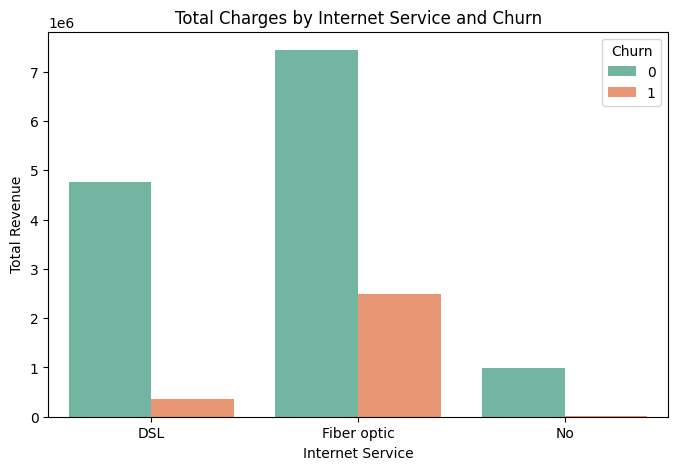

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=summary,
    x="InternetService",
    y="TotalCharges",
    hue="Churn",
    palette="Set2"
)

plt.title("Total Charges by Internet Service and Churn")
plt.xlabel("Internet Service")
plt.ylabel("Total Revenue")
plt.show()


In [34]:
df['InternetService'] = df['InternetService'].map({
    'DSL': 1,
    'Fiber optic': 2,
    'No': 0
})

In [35]:
df = pd.get_dummies(df, columns=["tenure_bin"], drop_first=True, dtype=int)
df.head()

,SeniorCitizen,tenure,InternetService,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,contract_risk,streaming_services,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,tenure_bin_1-2years,tenure_bin_2-4years,tenure_bin_4-6years
0,0,1,1,1,29.85,29.85,0,29.850000,1.000000,29.85,1,0,0,1,0,3,0,1,0,1,0,0,0
1,0,34,1,0,56.95,1889.50,0,55.573529,33.178227,1936.30,2,1,1,0,0,2,0,0,0,0,0,1,0
2,0,2,1,0,53.85,108.15,1,54.075000,2.008357,107.70,2,1,1,0,0,3,0,0,0,1,0,0,0
3,0,45,1,0,42.30,1840.75,0,40.905556,43.516548,1903.50,3,1,0,1,0,2,0,0,0,0,0,1,0
4,0,2,2,1,70.70,151.65,1,75.825000,2.144979,141.40,0,0,1,0,0,3,0,0,0,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SeniorCitizen                    7043 non-null   int64  
 1   tenure                           7043 non-null   int64  
 2   InternetService                  7043 non-null   int64  
 3   PaymentMethod                    7043 non-null   int64  
 4   MonthlyCharges                   7043 non-null   float64
 5   TotalCharges                     7032 non-null   float64
 6   Churn                            7043 non-null   int64  
 7   TotalCharges_per_tenure          7032 non-null   float64
 8   TotalCharges_per_monthlyCharges  7032 non-null   float64
 9   MonthlyCharges_tenure            7043 non-null   float64
 10  protection_score                 7043 non-null   int64  
 11  gender_Male                      7043 non-null   int64  
 12  PhoneService_Yes    

In [42]:
df.fillna(df.median(), inplace=True)

In [43]:
df.to_csv(r'C:\Users\StaunchTech\Documents\Gomycode Final Project\Data\processed\telco_customer_churn_feature_engineered.csv', index=False)


In [44]:
df = pd.read_csv(r"C:\Users\StaunchTech\Documents\Gomycode Final Project\Data\processed\telco_customer_churn_feature_engineered.csv")

In [45]:
df.head(5)

,SeniorCitizen,tenure,InternetService,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,TotalCharges_per_monthlyCharges,MonthlyCharges_tenure,protection_score,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,contract_risk,streaming_services,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,tenure_bin_1-2years,tenure_bin_2-4years,tenure_bin_4-6years
0,0,1,1,1,29.85,29.85,0,29.850000,1.000000,29.85,1,0,0,1,0,3,0,1,0,1,0,0,0
1,0,34,1,0,56.95,1889.50,0,55.573529,33.178227,1936.30,2,1,1,0,0,2,0,0,0,0,0,1,0
2,0,2,1,0,53.85,108.15,1,54.075000,2.008357,107.70,2,1,1,0,0,3,0,0,0,1,0,0,0
3,0,45,1,0,42.30,1840.75,0,40.905556,43.516548,1903.50,3,1,0,1,0,2,0,0,0,0,0,1,0
4,0,2,2,1,70.70,151.65,1,75.825000,2.144979,141.40,0,0,1,0,0,3,0,0,0,1,0,0,0


In [46]:
df.isna().sum()

SeniorCitizen                      0
tenure                             0
InternetService                    0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
Churn                              0
TotalCharges_per_tenure            0
TotalCharges_per_monthlyCharges    0
MonthlyCharges_tenure              0
protection_score                   0
gender_Male                        0
PhoneService_Yes                   0
MultipleLines_No phone service     0
MultipleLines_Yes                  0
contract_risk                      0
streaming_services                 0
Partner_Yes                        0
Dependents_Yes                     0
PaperlessBilling_Yes               0
tenure_bin_1-2years                0
tenure_bin_2-4years                0
tenure_bin_4-6years                0
dtype: int64